In [18]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
import qiskit
from qiskit import QuantumCircuit, transpile, assemble, Aer

# import basic plot tools
from qiskit.visualization import plot_histogram

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-02-09 14:32:57,053: Credentials are already in use. The existing account in the session will be replaced.


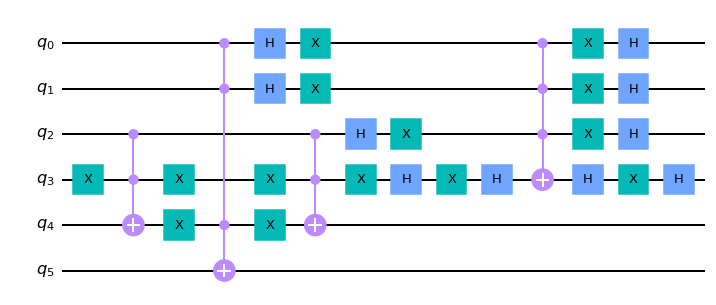

In [19]:
def grover_circuit():
   
    qc = QuantumCircuit(6)
    

    
    qc.x(3)
    qc.toffoli(2,3,4)
    qc.x(4)
    qc.x(3)
    qc.mct([0,1,4],5)
    qc.x(4)
    qc.x(3)
    qc.toffoli(2,3,4)
    qc.x(3)
    
   # qc.barrier(range(4))
    # Diffuser
    qc.h(range(4))
    qc.x(range(4))
    qc.h(3)
    qc.mct([0,1,2],3,0) 
    qc.h(3)             
    qc.x(range(4))
    qc.h(range(4))
    

    return qc
circ=grover_circuit()
circ.draw()

In [20]:
# criar um grover controlado pois vai dar jeito
grover = grover_circuit().to_gate()
grover.label = "Grover"
cgrover = grover.control(1)

In [21]:
def qft_dagger(n):
    
    
    circuit = QuantumCircuit(n)
    """
    def swap_registers(circuit, n):
        for qubit in range(n//2):
            circuit.swap(qubit, n-qubit-1)
        return circuit
    
    """
    def qft_dagger_rotations(circuit,n):
        
        #circuit.h(0)
        
        
        for j in range(0,n,1):
           
            for i in range(0,j,1):
                circuit.cp(-(np.pi)/2**(j-i),i, j)
            circuit.h(j)
                
    
    qft_dagger_rotations(circuit,n)
    #swap_registers(circuit, n)
    return circuit


In [22]:
x=qft_dagger(10)
#x.draw()

In [23]:

qft_dagger=qft_dagger(10).to_gate()
qft_dagger.label = "QFT†"


In [24]:
# Create QuantumCircuit
t = 10 
n = 6 
qc = QuantumCircuit(n+t, t) 

qc.x(t+n-1)
qc.h(t+n-1)


for qubit in range(t+n-2):
    qc.h(qubit)


iterations = t-1
for qubit in range(t):
    for i in range(2**iterations):
        qc.append(cgrover, [qubit] + [*range(t, n+t)])
    iterations =iterations -1
    

qc.append(qft_dagger, range(t))


qc.measure(range(t), range(t))


#qc.draw(scale=0.6)

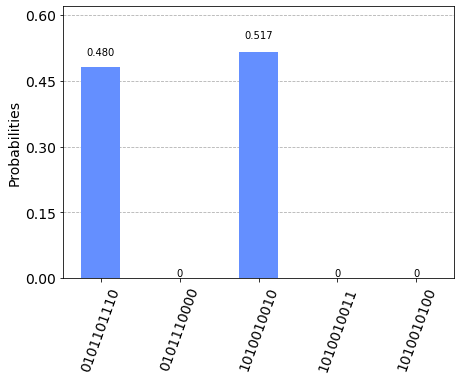

In [25]:
# Execute and see results
aer_sim = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, aer_sim)
qobj = assemble(transpiled_qc)
job = aer_sim.run(qobj)
hist = job.result().get_counts()
plot_histogram(hist)

In [26]:
measured_str = max(hist, key=hist.get)
print(measured_str)

1010010010


In [27]:
measured_int =int(measured_str,2)
print("Register Output = %i" % measured_int)

Register Output = 658


In [28]:
def calculate_M(measured_int, t, n):
    """For Processing Output of Quantum Counting"""
    # Calculate Theta
    theta = (measured_int/(2**t))*math.pi*2
    print("Theta = %.5f" % theta)
    # Calculate No. of Solutions
    N = 2**n
    M = N * (math.sin(theta/2)**2)
    #print("M:",M)
    print("No. of Solutions = %.1f" % (N-M))
    # Calculate Upper Error Bound
    m = t - 1 #Will be less than this (out of scope) 
    err = (math.sqrt(2*M*N) + N/(2**(m+1)))*(2**(-m))
    print("Error < %.2f" % err)

In [29]:

calculate_M(measured_int,t,4)

Theta = 4.03744
No. of Solutions = 3.0
Error < 0.04


In [ ]:
# com t=10 e acima dá bem (sem swap, com swap dá mal)
# com t=8 nem sempre dá bem